# In this we can predict the survival of person based on features like their ages, sexes, sibling counts, embarkment points etc,.

In [135]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#reading a dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


from this dataframe,our aim is to predict "Survived" column values(0 or 1) from the available features.

In [137]:
#to check how many rows and columns in dataframe
df.shape

(891, 12)

In [138]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### from above information,we can see that few objective datatype columns are present. so, we need to encode those required columns while building a model.

In [139]:
#to get statistics information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### from above information,we can be able to detect that "Age" column has less no.of records compared to other columns.so,we need to take care of it while building our model.

In [140]:
#to check all the values count in dependent variable 'quality'
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

from the above info:there were 342 people who got survived out of 891 people.


In [141]:
#to check whether any null values present in dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from this,we got null values which are present in columns like "Age","Cabin" and "Embarked",but out of these columns,we can see that too many null values are present for 
"Cabin" column which doesn't provide enough evidence for building a model
So,we can drop that column from dataframe

In [142]:
df = df.drop(["Cabin"],axis=1)


In [143]:
#we can also drop the "PassengerId" column which is containing just id numbers of each passengers.
df = df.drop(["PassengerId"],axis=1)

In [144]:
#Also we can drop "name" column which consists of name of each passenger
df = df.drop(["Name"],axis=1)

In [145]:
#Also we can drop columns like "Ticket" and "Fare" whose values doesn't account for building a model
df = df.drop(["Ticket","Fare"],axis=1)

In [146]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## visualization



In [147]:
import warnings
warnings.filterwarnings('ignore')

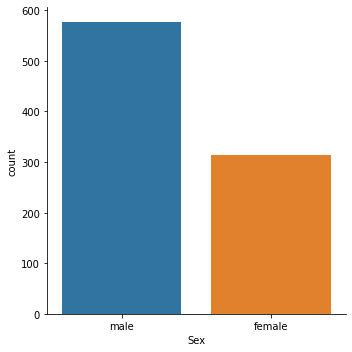

In [148]:

sns.factorplot('Sex', data=df, kind="count") ## Let's check gender

With this,there are more records on male compared female passengers in this dataset



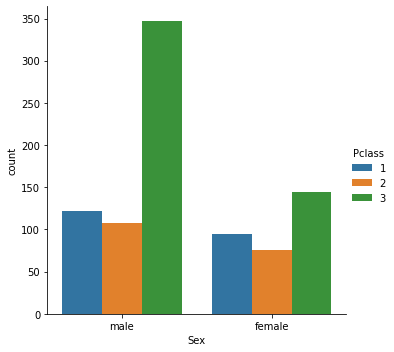

In [149]:
# Now let's seperate the genders by classes by using 'hue' arguement 

sns.factorplot('Sex', data=df, kind="count", hue='Pclass')

With this,we can see that no.of male passengers in calss 3 is making a big difference between the no.of male of female passengers.

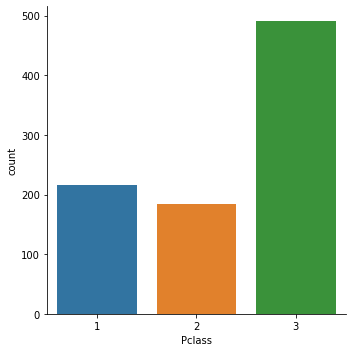

In [150]:
sns.factorplot('Pclass', data=df, kind="count")

Ofcorse,as we expect there are more passengers in class 3  compared to other class'.

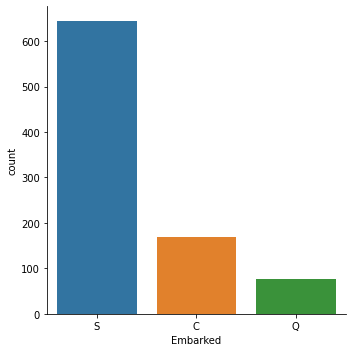

In [151]:
sns.factorplot('Embarked', data=df, kind="count")

So,the number of records are more for S(Southampton) port compared to others ports

In [152]:
# Now in order to deal with missing(NAN) values in age column,we can do 
#1)grouping by ("pclass") and ("Class") and
#2)Calculating the mean of whole column("age") and using apply funtion


df['mod_age'] = df['Age'].groupby([df['Pclass'], df['Sex']]).apply(lambda y: y.fillna(y.mean())) 

In [153]:
#now we drop "Age" column 

df = df.drop(["Age"],axis=1)

In [154]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,mod_age
0,0,3,male,1,0,S,22.0
1,1,1,female,1,0,C,38.0
2,1,3,female,0,0,S,26.0
3,1,1,female,1,0,S,35.0
4,0,3,male,0,0,S,35.0


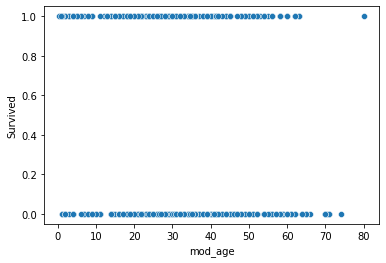

In [155]:
sns.scatterplot(x="mod_age",y="Survived",data=df)

with this graph,we can say that age column valuea are equally distributed between 12 to 67

In [156]:
#Since there are objective type columns("Sex" and "Embarked"), so we can just apply Label encoder on all of it.

from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [157]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,mod_age
0,0,3,1,1,0,2,22.0
1,1,1,0,1,0,0,38.0
2,1,3,0,0,0,2,26.0
3,1,1,0,1,0,2,35.0
4,0,3,1,0,0,2,35.0


## Correlation

In [158]:
df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,mod_age
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.163517,-0.067485
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,0.157112,-0.407015
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.104057,0.112851
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.066654,-0.251313
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.038322,-0.180705
Embarked,-0.163517,0.157112,0.104057,0.066654,0.038322,1.000000,-0.006740
mod_age,-0.067485,-0.407015,0.112851,-0.251313,-0.180705,-0.006740,1.000000


In [159]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.163517
mod_age    -0.067485
SibSp      -0.035322
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

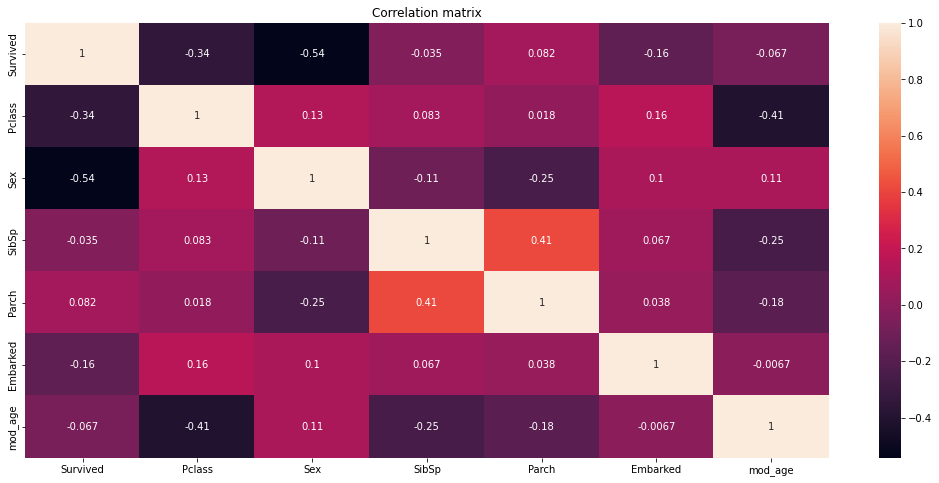

In [160]:
#plotting the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### With this graph,we can say that,
#### 1) All columns are negatively correlated with target variable and just one column is positively correlated with target variable.
#### 2)"Sex" column has high negative correlation(54%) with target variable.
#### 3)"SiParcbSp" column has low negative correlation(3.5%) with target variable.
#### 4)"Parch" is the only column which has positive correlation(8%) with target variable.


## Checking with outliers

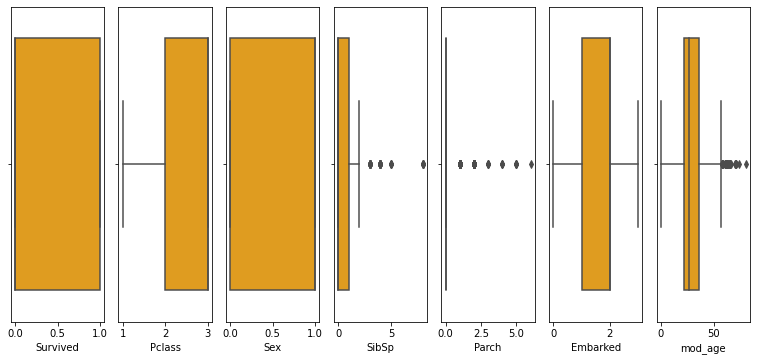

In [161]:
column_list = df.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (1.5*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

outliers present in "mod_age","SibSp" and "Parch" columns in which "mod_age" has more no.of outliers compared to others

## checking with Skewness

In [162]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
SibSp       3.695352
Parch       2.749117
Embarked   -1.246689
mod_age     0.498421
dtype: float64

with above evidence,SibSp column has more Skewness where as "mod_age" has least skewness

## Data cleaning


In [164]:
# With the above information considering the outliers and skewness,we dont have sufficient enough to remove any column,
# so,will proceed further by removing outliers and skewness

## Removing the outliers

In [165]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(891, 7)

In [166]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(891, 7)
(839, 7)
52


## calcuating the percentage of data loss

In [167]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:5.84%


data loss is very less,so its good to proceed further

### Dividing the Target variable and independent variables

In [168]:
x = df_new.iloc[:,1:] #independent variables
y = df_new.iloc[:,0] #dependent/target variable

## Transforming data to eliminate skewness

In [170]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.89050277,  0.73255036,  1.54523598, -0.49848718,  0.59805349,
        -0.56398979],
       [-1.43471106, -1.36509385,  1.54523598, -0.49848718, -1.74091936,
         0.70748083],
       [ 0.89050277, -1.36509385, -0.63447179, -0.49848718,  0.59805349,
        -0.23393066],
       ...,
       [ 0.89050277, -1.36509385,  1.54523598,  2.03470008,  0.59805349,
        -0.58495627],
       [-1.43471106,  0.73255036, -0.63447179, -0.49848718, -1.74091936,
        -0.23393066],
       [ 0.89050277,  0.73255036, -0.63447179, -0.49848718, -1.1312049 ,
         0.24475952]])

In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.89050277,  0.73255036,  1.54523598, -0.49848718,  0.59805349,
        -0.56398979],
       [-1.43471106, -1.36509385,  1.54523598, -0.49848718, -1.74091936,
         0.70748083],
       [ 0.89050277, -1.36509385, -0.63447179, -0.49848718,  0.59805349,
        -0.23393066],
       ...,
       [ 0.89050277, -1.36509385,  1.54523598,  2.03470008,  0.59805349,
        -0.58495627],
       [-1.43471106,  0.73255036, -0.63447179, -0.49848718, -1.74091936,
        -0.23393066],
       [ 0.89050277,  0.73255036, -0.63447179, -0.49848718, -1.1312049 ,
         0.24475952]])

with the above observation,we can see that both methods are performing in same way while removing the skewness of data.

## Selecting a best random state


In [174]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.8690476190476191  on Random state  149


In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 149)

In [176]:
print(x_train.shape,y_train.shape)

(671, 6) (671,)


In [177]:
print(x_test.shape,y_test.shape)

(168, 6) (168,)


In [191]:
# To predict whether the person is survived or not,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic))
print(classification_report(y_test,predic))

accuracy_score is 0.869
[[93  8]
 [14 53]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       101
           1       0.87      0.79      0.83        67

    accuracy                           0.87       168
   macro avg       0.87      0.86      0.86       168
weighted avg       0.87      0.87      0.87       168



In [192]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = LogisticRegression()
DT.fit(x_train,y_train)
predic = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))


accuracy_score is 0.869


In [194]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))


accuracy_score is 0.869


In [195]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))


accuracy_score is 0.869


## Cross Validation to check with overfitting

In [196]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.8045480467636155


In [197]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.787867122897063


In [198]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.8045480467636155


In [199]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.787867122897063


with above observation,both Logistic reg and Decision Tree models are performing well at same level and i will take my final model as "Decision Tree" model.

## Hyper parameter tuning

In [201]:
from sklearn.model_selection import GridSearchCV

params_list = {'max_features':['auto','sqrt','log2'],
               'max_depth':[4,5,6,7,8],
               'criterion':['gini','entropy']}
GCV = GridSearchCV(DecisionTreeClassifier(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}

In [202]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
accuracy_score(y_test,GCV_predic)

0.8690476190476191

## ROC AUC plot

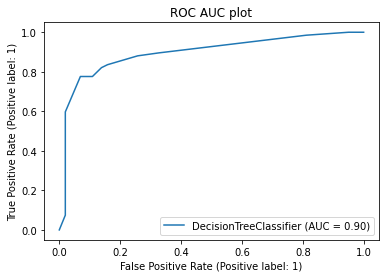

In [203]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 90% and final accuracy as 86% as well.

## Saving the model in pickle format

In [204]:
import joblib
joblib.dump(GCV.best_estimator_,"survivedpred.pkl")

['survivedpred.pkl']